In [ ]:
from json import load

with open("keys.json") as f:
    keys = load(f)

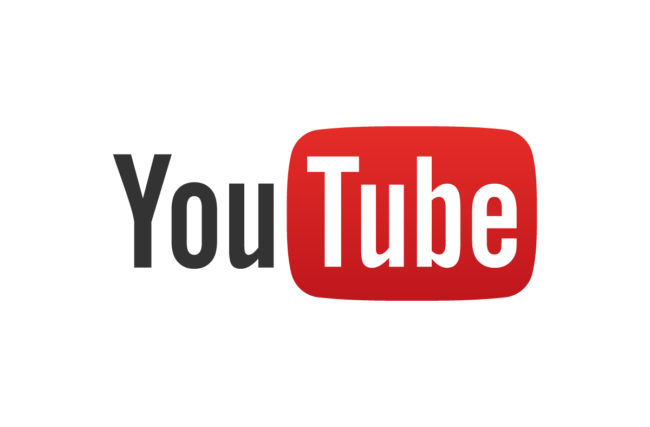

In [ ]:
from googleapiclient.discovery import build

api = build("youtube", "v3", developerKey = keys["youtube"]["developerKey"])

In [ ]:
response = api.search().list(q="The Developers Conference", part="snippet", type="channel").execute()

response

In [ ]:
channel_id = response["items"][0]["id"]["channelId"]

channel_id

In [ ]:
response = api.channels().list(id=channel_id, part="contentDetails").execute()

videos_id = response["items"][0]["contentDetails"]["relatedPlaylists"]["uploads"]

videos_id

In [ ]:
response = api.playlistItems().list(  
                                      playlistId=videos_id
                                    , part="snippet"
                                    , maxResults=50
                                    , pageToken=None
                                    ).execute()
videos = response["items"]

In [ ]:
totalViews = 0
totalLikes = 0

for v in videos:
    video_id = v["snippet"]["resourceId"]["videoId"]
    response = api.videos().list(id=video_id, part="statistics").execute()
    data = response["items"][0]["statistics"]
    totalViews += int(data["viewCount"])
    totalLikes += int(data["likeCount"])
    
percentualLikes = (totalLikes / totalViews) * 100
    
print(f"O percentual de likes nos vídeos do TDC é de {'%.2f' % percentualLikes}%")